# Data Science 301 Final Project
Anyesha Ray and Eric Gleiter

### Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vehicles.csv")
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [3]:
data.shape

(423857, 25)

In [4]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

### Variables we are interested in

Year

In [5]:
print (data['year'].value_counts().iloc[:10])

2017.0    30828
2015.0    21901
2014.0    21773
2013.0    21480
2016.0    21430
2012.0    19130
2011.0    18412
2018.0    17839
2019.0    16995
2008.0    16070
Name: year, dtype: int64


Text(0.5, 1.0, 'Number of Cars sold vs Year of the Car')

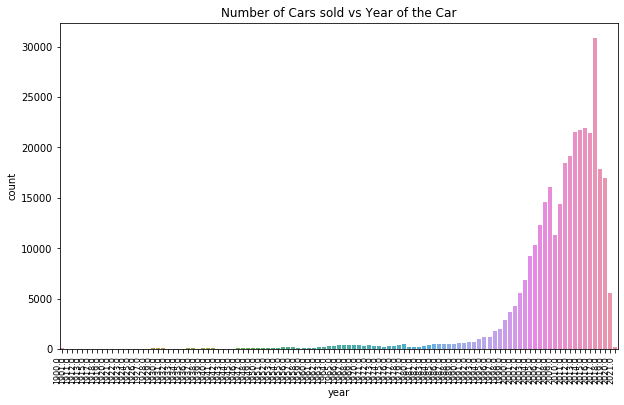

In [6]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Number of Cars sold vs Year of the Car")

 It seems that the car sales grew to large numbers during the 1960s. Doesn't really make sense to have cars before 1960.

In [7]:
data.drop(data[data.year < 1960].index, inplace = True)

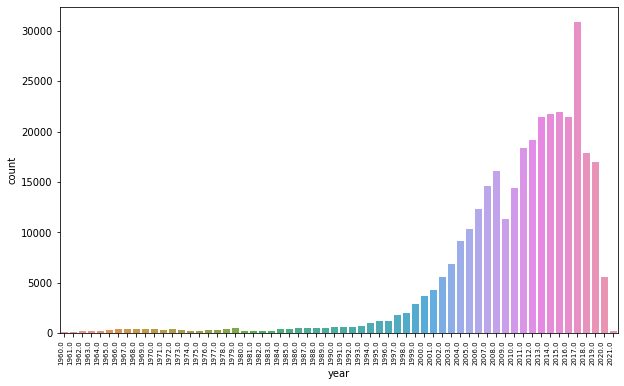

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=7);

Manufacturer

In [9]:
print ("The unique manufacturers we have are:")
print (data['manufacturer'].unique())

The unique manufacturers we have are:
['gmc' 'hyundai' 'toyota' 'mitsubishi' 'ford' 'chevrolet' 'ram' nan
 'buick' 'jeep' 'dodge' 'subaru' 'nissan' 'audi' 'rover' 'lexus' 'honda'
 'chrysler' 'mini' 'pontiac' 'mercedes-benz' 'cadillac' 'bmw' 'kia'
 'volvo' 'volkswagen' 'jaguar' 'acura' 'saturn' 'mazda' 'mercury'
 'lincoln' 'infiniti' 'ferrari' 'fiat' 'tesla' 'land rover'
 'harley-davidson' 'datsun' 'alfa-romeo' 'aston-martin' 'porche'
 'hennessey' 'morgan']


Text(0.5, 1.0, 'Manufacturers vs no. of listings')

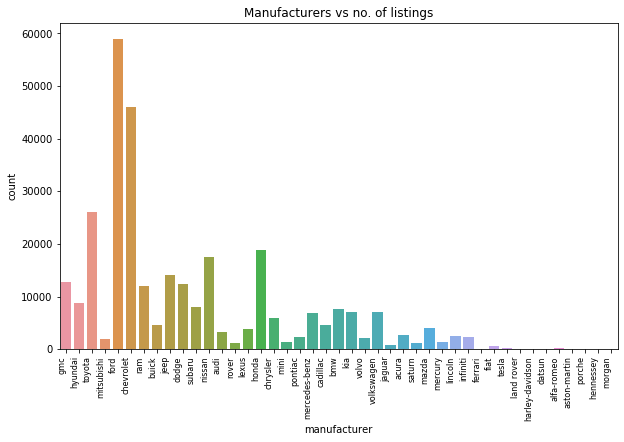

In [10]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='manufacturer',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Manufacturers vs no. of listings")

Model

In [11]:
print ("The unique models we have are:")
print (data['model'].unique())
print (len(data['model'].unique()))

The unique models we have are:
['new sierra 1500' 'sonata' 'prius' ... '1990 F350' 'ranchero gt cobra'
 'Studebaker GT Hawk Torisimo']
26326


Drive

In [12]:
print ("The unique drives we have are:")
print (data['drive'].unique())

The unique drives we have are:
['4wd' 'fwd' 'rwd' nan]


Condition

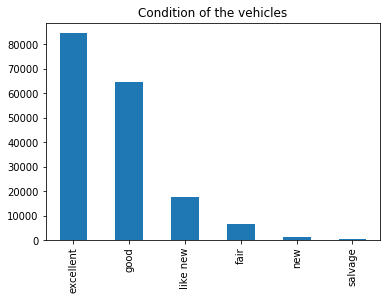

In [13]:
data.condition.value_counts().plot.bar()
plt.title("Condition of the vehicles")
plt.show()

Status

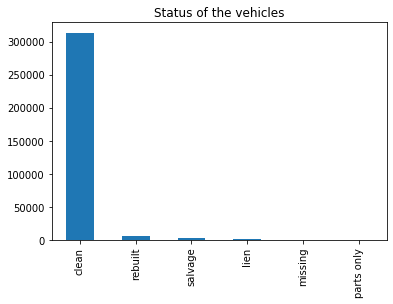

In [14]:
data.title_status.value_counts().plot.bar()
plt.title("Status of the vehicles")
plt.show()

Price

In [15]:
data['price'].describe()

count    4.214340e+05
mean     5.013835e+04
std      9.727504e+06
min      0.000000e+00
25%      4.495000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

Text(0, 0.5, 'Count')

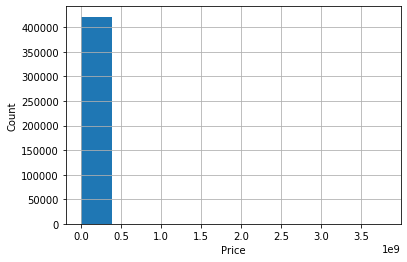

In [16]:
data['price'].hist()
plt.xlabel('Price')
plt.ylabel('Count')

In [17]:
data['price'].value_counts().head()

0       34947
3500     3827
8995     3589
7995     3536
6995     3456
Name: price, dtype: int64

Looks like there are a lot of prices at 0. This most likely means they were posted at "best offer". Since looking through description would make it too complicated, I just dropped them. There are only 35,000 values at 0, which sounds like a lot, but isn't that many out of 423,857. Also we would not be able to predict those entries anyways.


In [18]:
data= data[data['price'] > 0]

In [19]:
data.shape

(386487, 25)

### Missing Values

Won't need variables like 'url', 'region_url', 'image_url', 'description', 'county', 'state', 'lat', 'long' so I got rid of them right away.

In [20]:
data=data.drop(columns=['url','region','id', 'region_url', 'image_url', 'description', 'lat', 'long'])
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,county,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,NaN,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,NaN,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,NaN,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,NaN,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,NaN,mn


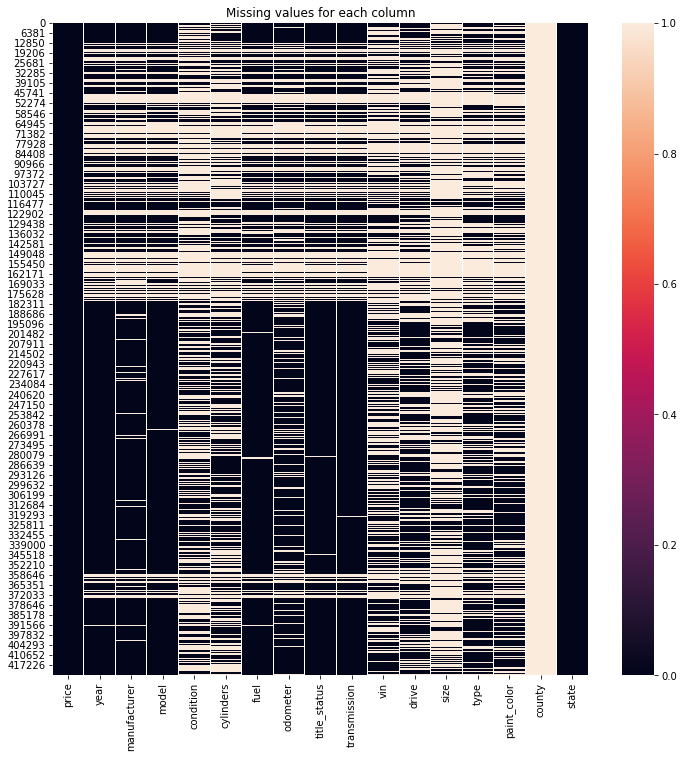

In [21]:
# Display the missing values
plt.figure(figsize=(12,12))
plt.title("Missing values for each column")
sns.heatmap(data.isnull())
plt.show()

In [22]:
data.isnull().sum()

price                0
year             87859
manufacturer    101543
model            90498
condition       221112
cylinders       203545
fuel             89135
odometer        138064
title_status     88532
transmission     88211
vin             221032
drive           175401
size            293043
type            168327
paint_color     182335
county          386487
state                0
dtype: int64

If the coumns have more than 50% missing then drop. 

In [23]:
more_than_50 = data.columns.where((data.isnull().sum()/len(data) * 100) >= 50).dropna()
data = data.drop(columns = more_than_50)
data.shape

(386487, 12)

Since we still have a lot of data to work with, I am just dropping the missing variables instead of imputing them.

In [24]:
data_clean=data.dropna()

In [25]:
data_clean.shape

(137848, 12)

In [26]:
data=data_clean
data.columns #what columns we are left with

Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137848 entries, 4 to 423856
Data columns (total 12 columns):
price           137848 non-null int64
year            137848 non-null float64
manufacturer    137848 non-null object
model           137848 non-null object
fuel            137848 non-null object
odometer        137848 non-null float64
title_status    137848 non-null object
transmission    137848 non-null object
drive           137848 non-null object
type            137848 non-null object
paint_color     137848 non-null object
state           137848 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 13.7+ MB


In [28]:
data.head()

,price,year,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,state
4,16995,2007.0,gmc,sierra classic 2500hd,diesel,254217.0,clean,automatic,4wd,truck,white,mn
5,13995,2012.0,ford,f-150,gas,188406.0,clean,automatic,4wd,truck,grey,mn
6,7995,2010.0,chevrolet,equinox,gas,108124.0,clean,automatic,4wd,SUV,grey,mn
7,8995,2011.0,chevrolet,traverse,gas,178054.0,clean,automatic,4wd,SUV,white,mn
8,10995,2014.0,ford,explorer,gas,170259.0,clean,automatic,4wd,SUV,white,mn


### Feautre Selection and Scaling

In [29]:
data = data.drop(columns=['model','state'])

In [30]:
#before doing anything we split the data into testing and training.
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42) 

In [31]:
data_train_encoded = pd.get_dummies(data_train)
data_train_encoded.head()


,price,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
223153,5500,1997.0,111000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
260942,3500,2006.0,198444.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231002,23613,2016.0,47833.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
89180,33912,2018.0,73811.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8370,19995,2015.0,63554.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#correlation matrix
corr_matrix = data_train_encoded.corr()
mat_values = corr_matrix["price"].sort_values(ascending=False)
mat_values

price                           1.000000
manufacturer_dodge              0.015108
paint_color_red                 0.009012
type_sedan                      0.004666
drive_fwd                       0.003201
year                            0.001972
transmission_automatic          0.001034
manufacturer_cadillac           0.000865
title_status_clean              0.000729
fuel_gas                        0.000693
manufacturer_ferrari            0.000150
manufacturer_aston-martin       0.000056
manufacturer_tesla              0.000008
manufacturer_porche            -0.000001
manufacturer_land rover        -0.000025
manufacturer_harley-davidson   -0.000031
manufacturer_alfa-romeo        -0.000037
manufacturer_datsun            -0.000042
title_status_parts only        -0.000073
type_bus                       -0.000074
manufacturer_rover             -0.000112
title_status_missing           -0.000128
fuel_electric                  -0.000133
type_offroad                   -0.000141
manufacturer_jag

In [33]:
cor_target = abs(corr_matrix["price"])
relevant_features = cor_target[cor_target>0.003]
relevant_features

price                 1.000000
manufacturer_dodge    0.015108
drive_fwd             0.003201
type_sedan            0.004666
paint_color_red       0.009012
Name: price, dtype: float64

In [34]:
attributes = ['manufacturer_dodge', 'drive_fwd','type_sedan','paint_color_red']
x1= data_train_encoded[attributes] #using the training set
y1= data_train_encoded['price'] # we can use risk good as there is only two levels for risk good or bad and so we can deduce what values have risk bad by where risk good == false


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)
x_scaled = scaler.transform(x1)

x_scaled_dataframe = pd.DataFrame(x_scaled,columns=x1.columns)
x_scaled_dataframe

x = x_scaled_dataframe
y = y1

In [36]:
data_test_encoded= pd.get_dummies(data_test)

x_test = data_test_encoded[attributes]
y_test = data_test_encoded['price']

x_scaled_test = scaler.transform(x_test) # we must preform the same transformation on the testing set as the training set
x_scaled_dataframe_test = pd.DataFrame(x_scaled_test,columns=x_test.columns)

x_test = x_scaled_dataframe_test


### Model Selection and Training

In [38]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

#polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x_test_poly = poly_features.fit_transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

#regulariized polynomial 
from sklearn.linear_model import Ridge
alpha = 0.05
ridge_reg1 = Ridge(alpha=alpha, solver="cholesky")
ridge_reg1.fit(x_poly, y)


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

#random foreest
reg_rnd = RandomForestRegressor(n_estimators=100, criterion='mse', n_jobs=-1)
reg_rnd.fit(x, y)

#adaboost
reg_adb = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, loss="square", random_state=4)
reg_adb.fit(x, y)

#xgb
reg_xgb = XGBRegressor(n_estimators=100, n_jobs=-1)
reg_xgb.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
#Linear Regression
y_pred_linear = lin_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_linear)
print("MSE linear model: {}".format(mse))
from math import sqrt
rmse = sqrt(mse)
print("RMSE linear model: {}".format(rmse))
print('\n')

#pol
y_pred_poly = poly_reg.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = sqrt(mse)
print("MSE polynomial model: {}".format(mse))
print("RMSE polynomial model: {}".format(rmse))
print('\n')

#regularized poly
y_pred_ridge1 = ridge_reg1.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred_ridge1)
rmse = sqrt(mse)
print("MSE ridge (alpha={}) : {}".format(alpha, mse))
print("RMSE ridge (alpha={}): {}".format(alpha, rmse))
print('\n')

#random forest
y_pred_rnd = reg_rnd.predict(x_test)
mse = mean_squared_error(y_test, y_pred_rnd)
rmse = sqrt(mse)
print("MSE Random Forest model: {}".format(mse))
print("RMSE Random Forest model: {}".format(rmse))
print('\n')

#adaboost
y_pred_ada = reg_adb.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ada)
rmse = sqrt(mse)
print("MSE Ada Boost model: {}".format(mse))
print("RMSE Ada Boost model: {}".format(rmse))
print('\n')

#xgb
y_pred_xgb = reg_xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = sqrt(mse)
print("MSE XGB model: {}".format(mse))
print("RMSE XGB model: {}".format(rmse))
print('\n')

MSE linear model: 19931065637.303257
RMSE linear model: 141177.42608966652


MSE polynomial model: 195640166798.01044
RMSE polynomial model: 442312.2955537303


MSE ridge (alpha=0.05) : 195564026683.8936
RMSE ridge (alpha=0.05): 442226.21664018696


MSE Random Forest model: 1495321125361.1665
RMSE Random Forest model: 1222833.2369383678


MSE Ada Boost model: 2152539804059.767
RMSE Ada Boost model: 1467153.6402366888


MSE XGB model: 1315958787997.9521
RMSE XGB model: 1147152.4693770886




Best model is the Ada Boost Model (by an order of magnitude) but, this model has no hyper parameters to tune so once we select it to move forward with we are done